<a href="https://colab.research.google.com/github/MarAmorosMtz/SamsungInnovationCampus/blob/main/ClasificacionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## El CIFAR-10 es un conjunto de datos de imágenes muy utilizado en el campo del aprendizaje automático y la visión por computadora. Contiene 60,000 imágenes en color de 32x32 píxeles, organizadas en 10 categorías diferentes.

In [2]:
dataset = keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()  #Se cargan los elementos del dataset y se separan en entrenamiento y prueba

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
clases = ['avión', 'automóvil', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

Las imagenes del CIFAR-10 son de 32 x 32 pixeles<br>
Hay 10 clases representadas del 0 al 9<br>
Keras no proporciona las etiquetas sin embargo pueden ser almacenadas en un arreglo estatico en el orden que proporciona su sitio oficial

In [5]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


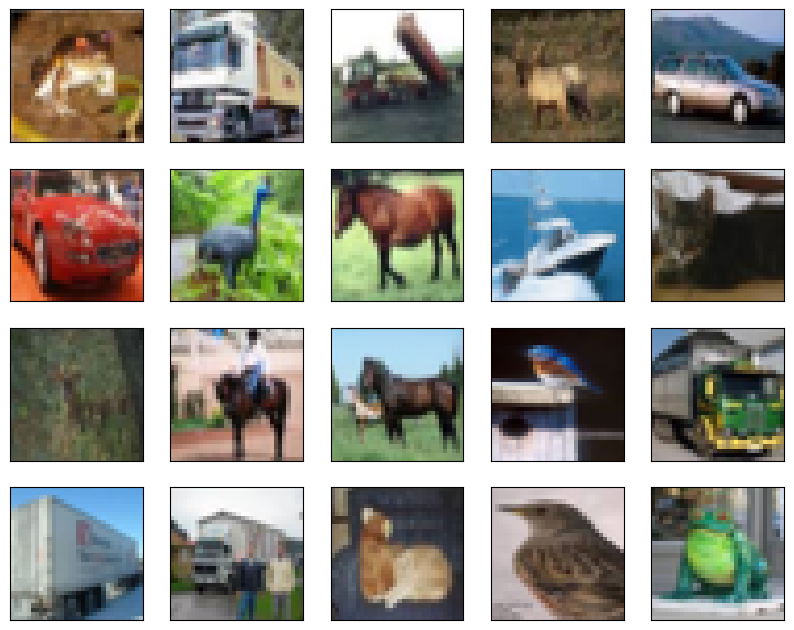

In [6]:
# Se muestran algunas imagenes del dataset para entender su contenido
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

# Preprocesamiento de los datos

In [7]:
x_train = x_train / 255.0
x_test =  x_test / 255.0

print(x_train[0]) #Normalizacion de las imagenes para tener valores en el rango 0 - 1 en los pixeles

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [8]:
# La normalizacion es importante para procurar la integridad de los datos y lograr asi un optimo entrenamiento de los modelos de inteligencia artificial
print(f'Previo al formato one-hot encoding: {y_train[0]}')

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(f'Posterior al formato one-hot encoding: {y_train[0]}')

Previo al formato one-hot encoding: [6]
Posterior al formato one-hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Construccion del modelo CNN

In [9]:
from tensorflow.keras import layers

In [10]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilacion del modelo

In [14]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,098 (629.29 KB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

# Entrenamiento del Modelo

In [22]:
epochs = 25
batch_size = 64
history = model.fit(
    x_train, y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test)
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - accuracy: 0.7433 - loss: 0.8722 - val_accuracy: 0.7501 - val_loss: 0.8601
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 127ms/step - accuracy: 0.7478 - loss: 0.8688 - val_accuracy: 0.7504 - val_loss: 0.8612
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 135ms/step - accuracy: 0.7553 - loss: 0.8446 - val_accuracy: 0.7566 - val_loss: 0.8335
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 129ms/step - accuracy: 0.7554 - loss: 0.8398 - val_accuracy: 0.7489 - val_loss: 0.8778
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 132ms/step - accuracy: 0.7598 - loss: 0.8282 - val_accuracy: 0.7613 - val_loss: 0.8298
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 129ms/step - accuracy: 0.7622 - loss: 0.8115 - val_accuracy: 0.7344 - val_loss: 0.9132
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 130ms/step - accuracy: 0.7649 - loss: 0.8043 - val_accuracy: 0.7668 - val_loss: 0.8130
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 128ms/step - accuracy: 0.7716 -

KeyboardInterrupt: 

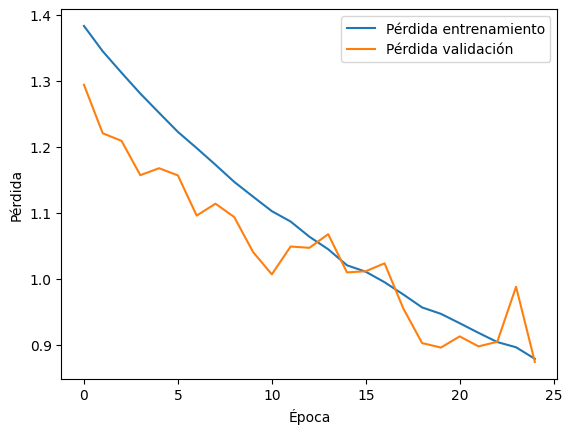

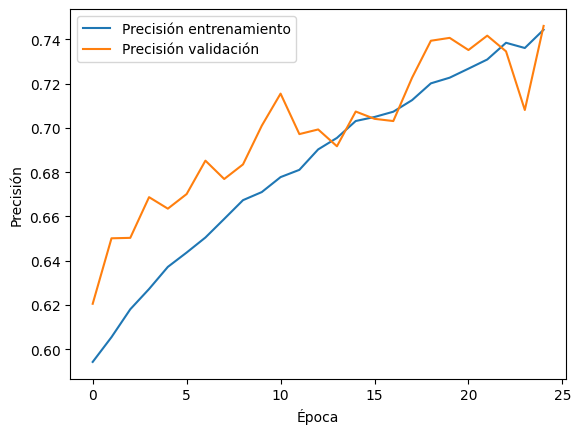

In [24]:
#Grafica de Perdidas
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluacion del modelo con datos de prueba

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Perdida en el conjunto de prueba:", test_loss)
print("Precision en el conjunto de prueba:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7853 - loss: 0.7485
Perdida en el conjunto de prueba: 0.746880829334259
Precision en el conjunto de prueba: 0.7838000059127808


In [34]:
# Expande las dimensiones de la imagen
single_image = np.expand_dims(x_test[3], axis=0)

# Haz la predicción
prediction = model.predict(single_image)

predicted_class = np.argmax(prediction)
print(f"La clase predicha es: {clases[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
La clase predicha es: avión


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

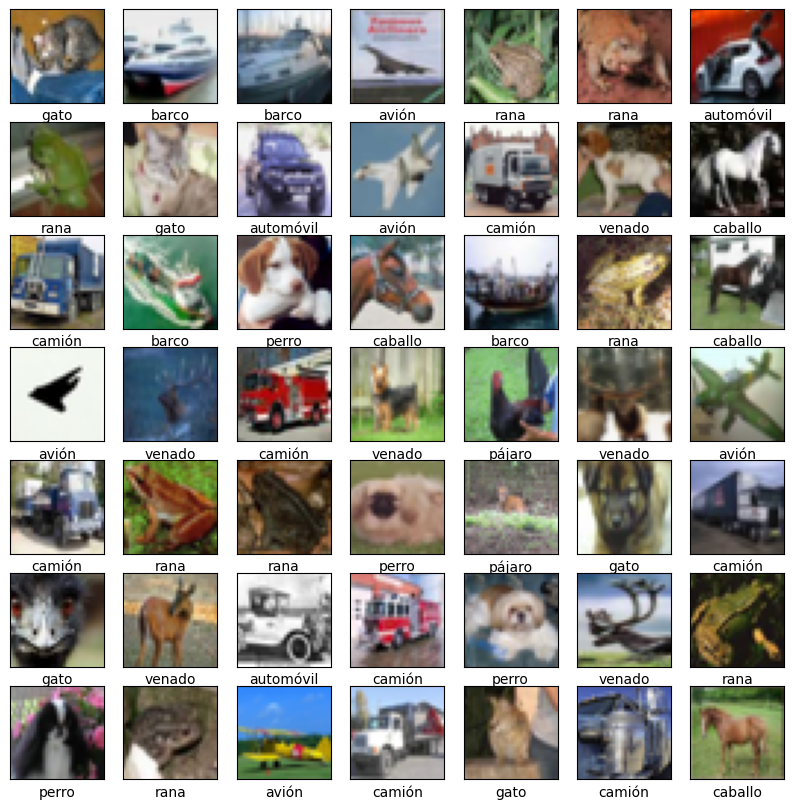

In [42]:
plt.figure(figsize=(10,10))
for i in range(49):
  plt.subplot(7, 7, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  single_image = np.expand_dims(x_test[i], axis=0)
  prediction = model.predict(single_image)
  predicted_class = np.argmax(prediction)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(clases[predicted_class])
plt.show()